<a href="https://colab.research.google.com/github/aarongeo1/NUM-CLASSIFY/blob/add-license-1/Imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf


In [4]:
from tensorflow.keras.datasets import mnist
(trainx, trainy), (testx, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


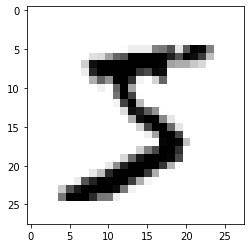

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(trainx[0], cmap = 'binary')
plt.show()

In [7]:

print(set(trainy))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [8]:
from tensorflow.keras.utils import to_categorical

trainy_encoded = to_categorical(trainy)
testy_encoded = to_categorical(testy)
print(trainy_encoded.shape)
print(testy_encoded.shape)
trainy_encoded[0]

(60000, 10)
(10000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
import numpy as np

trainx_reshaped = np.reshape(trainx, (60000, 784))
testx_reshaped = np.reshape(testx, (10000, 784))

print(trainx_reshaped.shape,"\n", testx_reshaped.shape)
print(set(trainx_reshaped[0]))
x_mean = np.mean(trainx_reshaped)
x_std = np.std(trainx_reshaped)

epsilon = 1e-10

trainx_norm = (trainx_reshaped - x_mean) /(x_std + epsilon)
testx_norm = (testx_reshaped - x_mean) / (x_std + epsilon)
print(set(trainx_norm[0]))

(60000, 784) 
 (10000, 784)
{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}
{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape =(784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [11]:
model.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(trainx_norm, trainy_encoded, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1683 - accuracy: 0.9515
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1316 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1083 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0924 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0803 - accuracy: 0.9765


In [14]:
loss, accuracy = model.evaluate(testx_norm, testy_encoded)
print("Test set accuracy: ", accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9703
Test set accuracy:  97.0300018787384


In [15]:
preds = model.predict(testx_norm)
print(preds.shape)

(10000, 10)


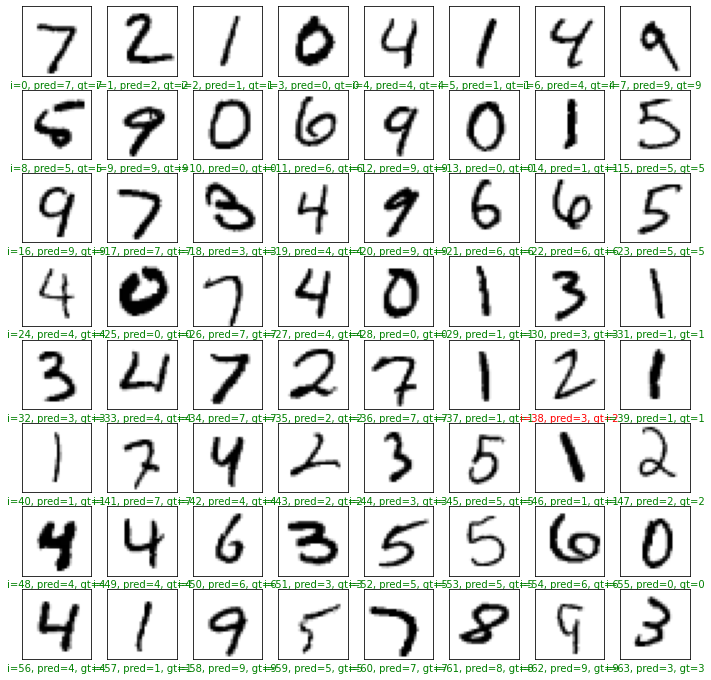

In [16]:
plt.figure(figsize = (12,12))

start_index = 0

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index + i])
    gt = testy[start_index + i]
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color = col)
    plt.imshow(testx[start_index + i], cmap = 'binary')
plt.show()